In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_classification
from time import time

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
X = data.x
y = data.y

In [27]:
data

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453
...,...,...,...
95,95,48.319708,3378.732888
96,96,38.839934,4399.466632
97,97,27.230125,13526.262233
98,98,19.224476,22652.889411


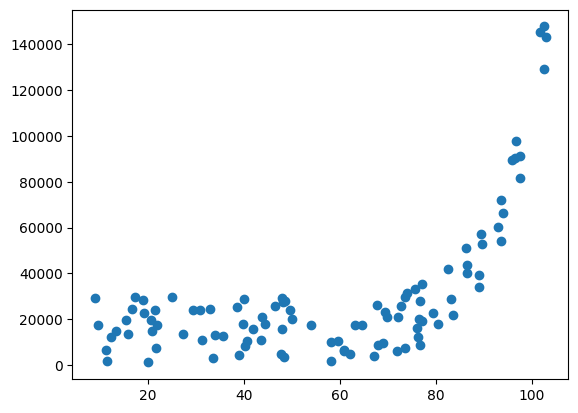

In [28]:
plt.scatter(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


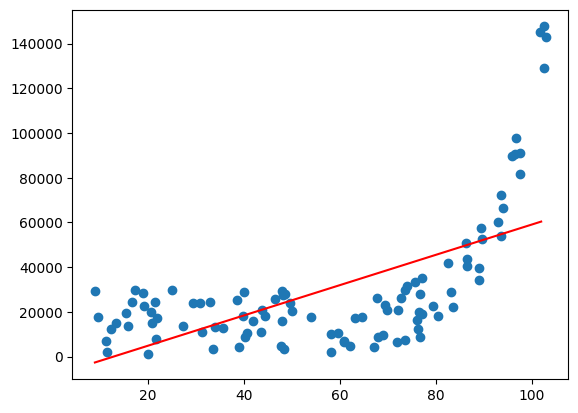

In [29]:
from sklearn.linear_model import LinearRegression
X = pd.DataFrame(X)
start_time = time()
linear = LinearRegression().fit(X, y)
end_time = time()
line_time = end_time - start_time
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [30]:
linear.score(X, y)

0.37467360318911636

In [31]:
X = data.x.values.reshape(-1, 1)
y = data.y

# Линейная регрессия
start_time = time()
linear = LinearRegression().fit(X, y)
end_time = time()
line_time = end_time - start_time

# Построение графика линейной модели
xx = np.arange(X.min(), X.max()).reshape(-1, 1)
yy = linear.predict(xx)
print("Время обучения линейной модели:", line_time)
print("Коэффициенты линейной модели:", linear.coef_)

Время обучения линейной модели: 0.002963542938232422
Коэффициенты линейной модели: [677.87534859]


In [32]:
start_time = time()
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
end_time = time()
poly_time_1 = end_time - start_time
X_2 = transformation.transform(X)
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [33]:
start_time = time()
poly_2d = LinearRegression().fit(X_2, y)
end_time = time()
poly_time = end_time - start_time
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)


In [34]:
poly_2d.score(X_2, y)

0.7359753787024842

In [47]:
data_regression = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
X_regression = data_regression.x.values.reshape(-1, 1)
y_regression = data_regression.y
degrees = [2, 5, 10,100]
model_times_regression = []
model_scores_regression = []
model_times = []
for degree in degrees:
    start_time = time()
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_regression)
    poly_model = LinearRegression().fit(X_poly, y_regression)
    end_time = time()
    model_times_regression.append(end_time - start_time)
    model_scores_regression.append(poly_model.score(X_poly, y_regression))
    model_times.append(end_time - start_time)

for i, degree in enumerate(degrees):
    print(f"Время обучения полиномиальной модели {degree} степени:", model_times[i])

Время обучения полиномиальной модели 2 степени: 0.005208015441894531
Время обучения полиномиальной модели 5 степени: 0.0027506351470947266
Время обучения полиномиальной модели 10 степени: 0.002580404281616211
Время обучения полиномиальной модели 100 степени: 0.00467681884765625


In [36]:
# Интерпретация полиномиальной модели
poly_5 = PolynomialFeatures(degree=5)
X_poly_5 = poly_5.fit_transform(X)
poly_model_5 = LinearRegression().fit(X_poly_5, y)

poly_10 = PolynomialFeatures(degree=10)
X_poly_10 = poly_10.fit_transform(X)
poly_model_10 = LinearRegression().fit(X_poly_10, y)

poly_100 = PolynomialFeatures(degree=100)
X_poly_100 = poly_100.fit_transform(X)
poly_model_100 = LinearRegression().fit(X_poly_100, y)

In [37]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


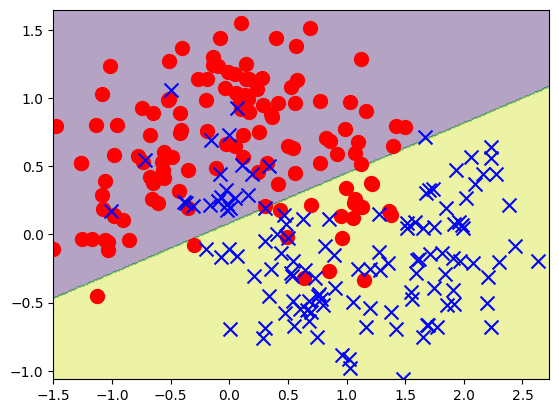

In [38]:
logistic = LogisticRegression().fit(X, y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [39]:
data_classification = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
X_classification = data_classification.drop(["y"], axis=1)
y_classification = data_classification.y

model_times_classification = []
model_scores_classification = []
for degree in degrees:
    start_time = time()
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_class = poly_features.fit_transform(X_classification)
    poly_model_class = LogisticRegression().fit(X_poly_class, y_classification)
    end_time = time()
    model_times_classification.append(end_time - start_time)
    model_scores_classification.append(poly_model_class.score(X_poly_class, y_classification))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


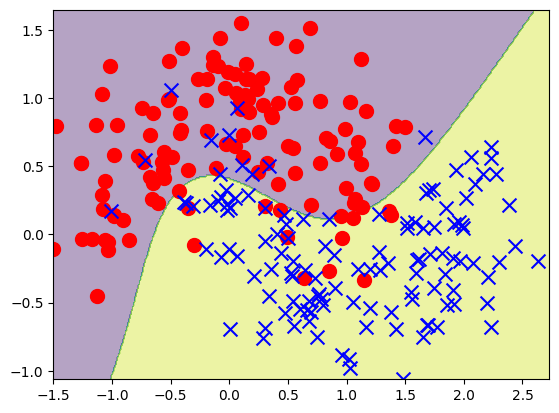

In [41]:
class_3 = LogisticRegression().fit(X_3, y)
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [42]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [43]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

In [44]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8650781867438108

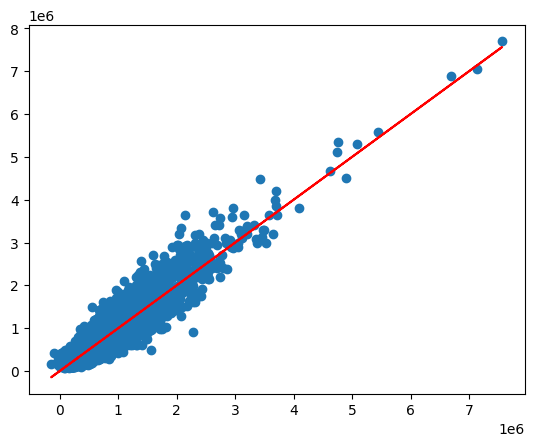

In [45]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [ ]:
model_scores_kc_prices = []
model_times_kc_prices = []
for degree in degrees:
    start_time = time()
    poly_features_kc_prices = PolynomialFeatures(degree=degree)
    X_poly_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)
    poly_model_kc_prices = LinearRegression().fit(X_poly_kc_prices, y_kc_prices)
    end_time = time()
    model_times_kc_prices.append(end_time - start_time)
    model_scores_kc_prices.append(poly_model_kc_prices.score(X_poly_kc_prices, y_kc_prices))

In [46]:
print("Время обучения и точность моделей для задачи регрессии:")
print("Степень полинома | Время обучения | Точность")
for i, degree in enumerate(degrees):
    print(f"{degree} | {model_times_regression[i]} | {model_scores_regression[i]}")

print("\nВремя обучения и точность моделей для задачи классификации:")
print("Степень полинома | Время обучения | Точность")
for i, degree in enumerate(degrees):
    print(f"{degree} | {model_times_classification[i]} | {model_scores_classification[i]}")

#print("\\nВремя обучения и точность моделей для задачи прогнозирования цен на дома:")
#print("Степень полинома | Время обучения | Точность")
#for i, degree in enumerate(degrees):
    #print(f"{degree} | {model_times_kc_prices[i]} | {model_scores_kc_prices[i]}")

# Вывод коэффициентов линейной модели и соответствующих атрибутов для задачи прогнозирования цен на дома
print("\nКоэффициенты линейной модели для задачи прогнозирования цен на дома:", reg_kc_multiple.coef_)
print("Атрибуты модели:", list(X_kc_prices.columns))

# Вывод относительной важности атрибутов для задачи прогнозирования цен на дома
importance = np.abs(reg_kc_multiple.coef_)
importance /= importance.sum()
print("\nОтносительная важность атрибутов:", importance)

Время обучения и точность моделей для задачи регрессии:
Степень полинома | Время обучения | Точность
2 | 0.002199888229370117 | 0.7359753787024842
5 | 0.0015125274658203125 | 0.9217478060447024
10 | 0.0015730857849121094 | 0.9232002062571606
100 | 0.0041179656982421875 | 0.7924620004439387

Время обучения и точность моделей для задачи классификации:
Степень полинома | Время обучения | Точность
2 | 0.007517576217651367 | 0.836
5 | 0.009186744689941406 | 0.916
10 | 0.022922039031982422 | 0.924
100 | 0.060361385345458984 | 0.5

Коэффициенты линейной модели для задачи прогнозирования цен на дома: [-3.57665414e+04  4.11442785e+04  1.10442865e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852244e+01  3.96576400e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]
Атрибуты модели: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'con